<a href="https://colab.research.google.com/github/baisefuel/Spotify/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Импорт библиотек

In [1]:
import numpy as np
import unittest
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
  '''
  X - матрицы (n, n)
  V - векторы (n, 1)
  Гарантируется, что len(X) == len(V)
  '''
  matrices = np.array(X)
  vectors = np.array(V)

  result = np.sum(np.matmul(matrices, vectors), axis=0)
  return result

# Тесты

In [3]:
class TestSumProd(unittest.TestCase):
  def test_sum_prod_one(self):
    matrices = [
      np.array([[1, 2], [3, 4]]),
      np.array([[2, 0], [1, 2]])
    ]
    vectors = [
      np.array([[1], [2]]),
      np.array([[3], [4]])
    ]
    np.testing.assert_array_equal(sum_prod(matrices, vectors), np.array([[11], [22]]))

  def test_sum_prod_two(self):
    matrices = [
      np.array([[0, 0, 1], [3, 4, 5], [2, 1, 7]]),
      np.array([[2, 0, 0], [1, 2, 2], [4, 3, 2]]),
      np.array([[2, 2, 2], [3, 1, 2], [7, 8, 9]]),
    ]
    vectors = [
      np.array([[1], [2], [3]]),
      np.array([[4], [5], [6]]),
      np.array([[7], [8], [9]])
    ]
    np.testing.assert_array_equal(sum_prod(matrices, vectors), np.array([[59], [99], [262]]))

unittest.main(argv=[''], verbosity=2, exit=False)

test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.037s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

# Тесты

In [5]:
class TestBinarize(unittest.TestCase):
  def test_binarize_one(self):
    M = np.array([[1, 5, 7], [3, 8, 2], [6, 4, 9]])
    expected = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    np.testing.assert_array_equal(binarize(M), expected)

  def test_binarize_two(self):
    M = np.array([[1, 2], [3, 4]])
    threshold = 10
    expected = np.array([[0, 0], [0, 0]])
    np.testing.assert_array_equal(binarize(M, threshold), expected)

  unittest.main(argv=[''], verbosity=2, exit=False)

test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):
  return np.apply_along_axis(np.unique, 1, mat)

def unique_columns(mat):
  unique_cols = []
  for i in range(mat.shape[1]):
    unique_cols.append(np.unique(mat[:, i]))
  return unique_cols

# Тесты

In [7]:
class TestUnique(unittest.TestCase):
  def test_unique_rows(self):
    mat = np.array([[1, 2, 2], [3, 3, 4]])
    result = unique_rows(mat)
    expected = [np.array([1, 2]), np.array([3, 4])]
    self.assertTrue((result[0] == expected[0]).all())
    self.assertTrue((result[1] == expected[1]).all())

  def test_unique_columns(self):
    mat = np.array([[1, 2], [1, 3], [1, 2]])
    result = unique_columns(mat)
    expected = [np.array([1]), np.array([2, 3])]
    self.assertTrue((result[0] == expected[0]).all())
    self.assertTrue((result[1] == expected[1]).all())

  unittest.main(argv=[''], verbosity=2, exit=False)

test_binarize_one (__main__.TestBinarize.test_binarize_one) ... ok
test_binarize_two (__main__.TestBinarize.test_binarize_two) ... ok
test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание строк: [-0.10255383 -0.17931395 -0.30003933  0.23730417  0.47801984]
Дисперсия строк: [0.81531823 0.58787221 2.01080161 0.58540045 2.32611192]
Математическое ожидание столбцов: [ 0.2012653  -0.81306194  0.0682739   0.65025625]
Дисперсия столбцов: [1.29437056 1.0358643  1.1554797  0.77962553]


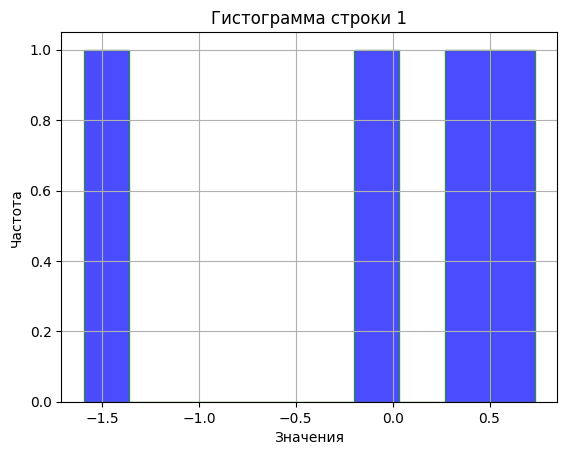

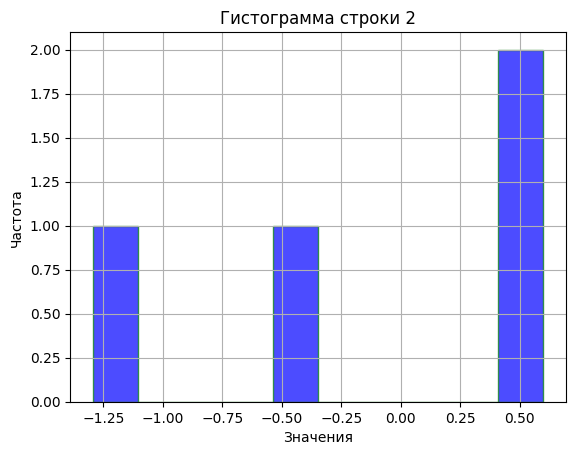

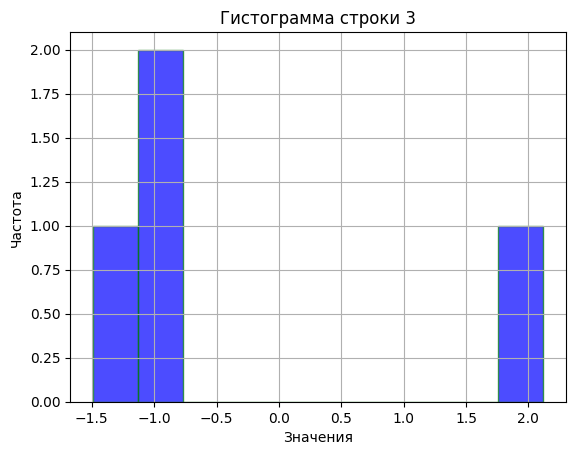

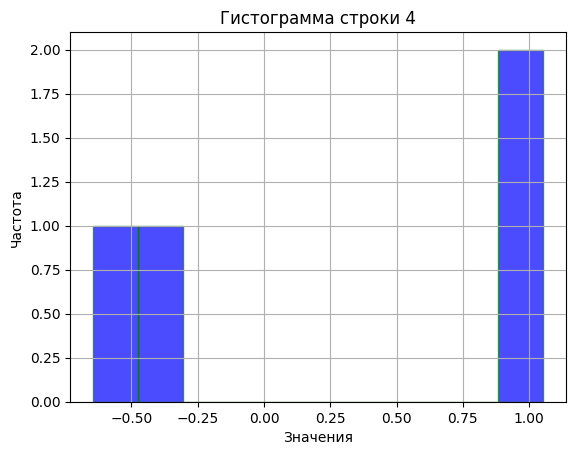

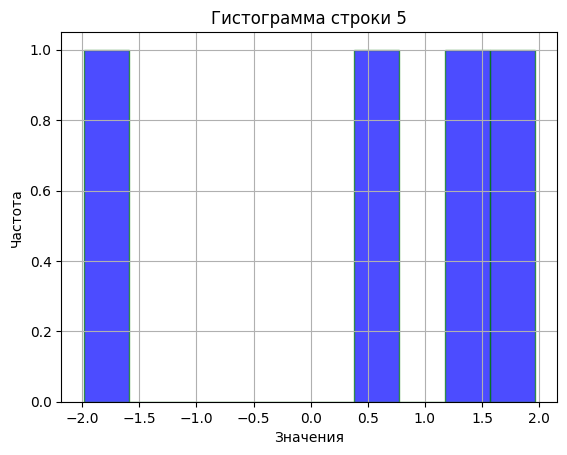

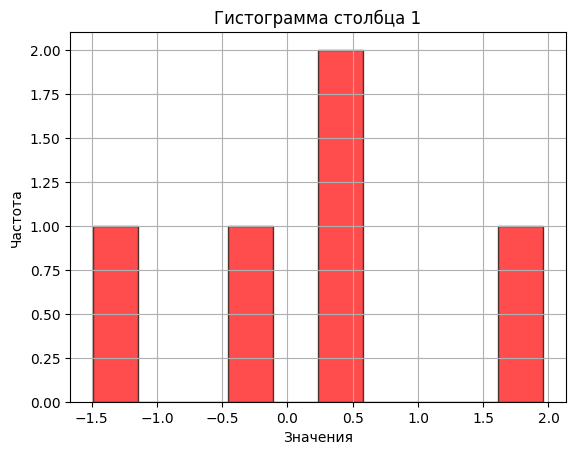

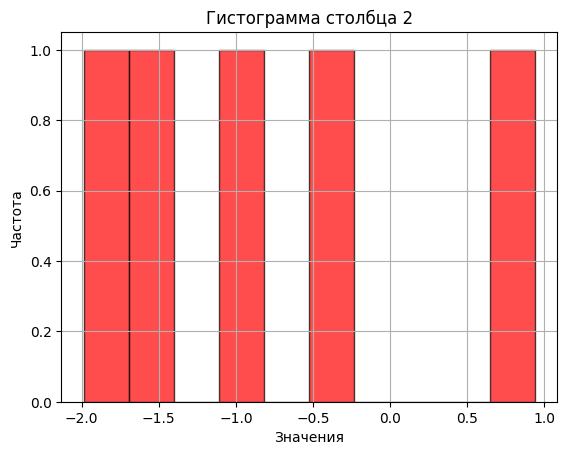

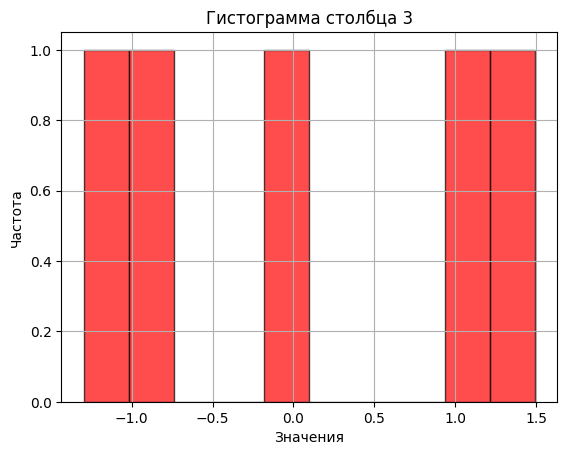

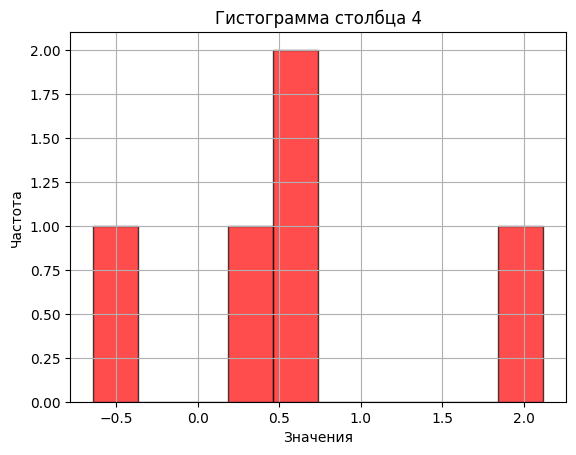

(array([[ 0.47486081, -1.5936405 , -0.02461589,  0.73318027],
        [ 0.4596136 , -0.48048401, -1.29569388,  0.59930848],
        [-1.49370684, -0.94292043, -0.88486397,  2.12133391],
        [-0.39641656,  0.93798709,  1.05435271, -0.64670657],
        [ 1.96197547, -1.98625186,  1.49219055,  0.44416518]]),
 array([-0.10255383, -0.17931395, -0.30003933,  0.23730417,  0.47801984]),
 array([0.81531823, 0.58787221, 2.01080161, 0.58540045, 2.32611192]),
 array([ 0.2012653 , -0.81306194,  0.0682739 ,  0.65025625]),
 array([1.29437056, 1.0358643 , 1.1554797 , 0.77962553]))

In [8]:
def analyze_matrix(m, n, mean=0, std=1):
  matrix = np.random.normal(mean, std, (m, n))
  row_means = np.mean(matrix, axis=1)
  row_vars = np.var(matrix, axis=1)
  col_means = np.mean(matrix, axis=0)
  col_vars = np.var(matrix, axis=0)

  print("Математическое ожидание строк:", row_means)
  print("Дисперсия строк:", row_vars)
  print("Математическое ожидание столбцов:", col_means)
  print("Дисперсия столбцов:", col_vars)

  for i in range(m):
    plt.figure()
    plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue', edgecolor='green')
    plt.title(f'Гистограмма строки {i+1}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

  for j in range(n):
    plt.figure()
    plt.hist(matrix[:, j], bins=10, alpha=0.7, color='red', edgecolor='black')
    plt.title(f'Гистограмма столбца {j+1}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

  return matrix, row_means, row_vars, col_means, col_vars

analyze_matrix(5, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
def chess_matrix(m, n, a, b):
  matrix = np.zeros((m, n), dtype=object)
  for x in range(m):
    for y in range(n):
      if (x + y) % 2 == 0:
        matrix[x, y] = a
      else:
        matrix[x, y] = b
  return matrix.tolist()

# Тесты

In [10]:
class TestChessMatrix(unittest.TestCase):
  def test_2x2(self):
    self.assertEqual(
      chess_matrix(2, 2, 9, 1), [[9, 1], [1, 9]]
    )

  def test_3x3(self):
    self.assertEqual(
      chess_matrix(3, 3, 6, 0), [[6, 0, 6], [0, 6, 0], [6, 0, 6]]
    )

  unittest.main(argv=[''], verbosity=2, exit=False)

test_binarize_one (__main__.TestBinarize.test_binarize_one) ... ok
test_binarize_two (__main__.TestBinarize.test_binarize_two) ... ok
test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.016s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [11]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  image = np.full((m, n, 3), background_color, dtype=np.uint8)
  start_x = (n - a) // 2
  start_y = (m - b) // 2
  image[start_y:start_y + b, start_x:start_x + a] = rectangle_color
  plt.imshow(image)
  plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
  image = np.full((m, n, 3), background_color, dtype=np.uint8)
  y, x = np.ogrid[:m, :n]
  center_x, center_y = n // 2, m // 2
  mask = ((x - center_x) ** 2 / a ** 2 + (y - center_y) ** 2 / b ** 2) <= 1
  image[mask] = ellipse_color
  plt.imshow(image)
  plt.show()

# Тесты

In [12]:
class TestDrawFunctions(unittest.TestCase):
  def test_rectangle_creation(self):
    draw_rectangle(50, 30, 100, 100, (255, 0, 0), (255, 255, 255))

  def test_ellipse_creation(self):
    draw_ellipse(40, 20, 100, 100, (0, 255, 0), (255, 255, 255))

  unittest.main(argv=[''], verbosity=2, exit=False)

test_binarize_one (__main__.TestBinarize.test_binarize_one) ... ok
test_binarize_two (__main__.TestBinarize.test_binarize_two) ... ok
test_2x2 (__main__.TestChessMatrix.test_2x2) ... ok
test_3x3 (__main__.TestChessMatrix.test_3x3) ... ok
test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.015s

OK


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [13]:
def time_series_analysis(series, p):
  mean = np.mean(series)
  variance = np.var(series)
  std_dev = np.std(series)
  local_maxima = []
  for i in range(1, len(series) - 1):
    if series[i] > series[i - 1] and series[i] > series[i + 1]:
      local_maxima.append(i)

  local_minima = []
  for i in range(1, len(series) - 1):
    if series[i] < series[i - 1] and series[i] < series[i + 1]:
      local_minima.append(i)

  moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

  return {
    "mean": mean,
    "variance": variance,
    "std_dev": std_dev,
    "local_maxima": local_maxima,
    "local_minima": local_minima,
    "moving_average": moving_avg.tolist()
  }

# Тесты

test_binarize_one (__main__.TestBinarize.test_binarize_one) ... ok
test_binarize_two (__main__.TestBinarize.test_binarize_two) ... ok
test_2x2 (__main__.TestChessMatrix.test_2x2) ... ok
test_3x3 (__main__.TestChessMatrix.test_3x3) ... ok
test_ellipse_creation (__main__.TestDrawFunctions.test_ellipse_creation) ... 

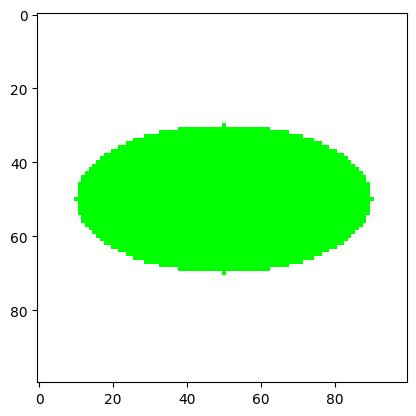

ok
test_rectangle_creation (__main__.TestDrawFunctions.test_rectangle_creation) ... 

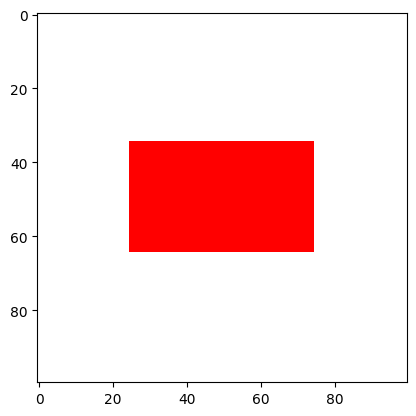

ok
test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.266s

OK


In [14]:
class TestTimeSeriesAnalysis(unittest.TestCase):
  def test_analysis(self):
    series = [1, 3, 7, 1, 2, 6, 4, 5, 9, 2]
    result = time_series_analysis(series, 3)
    self.assertAlmostEqual(result["mean"], np.mean(series))
    self.assertAlmostEqual(result["variance"], np.var(series))
    self.assertAlmostEqual(result["std_dev"], np.std(series))
    self.assertEqual(result["local_maxima"], [2, 5, 8])
    self.assertEqual(result["local_minima"], [3, 6])
    self.assertEqual(result["moving_average"], np.convolve(series, np.ones(3)/3, mode='valid').tolist())

  unittest.main(argv=[''], verbosity=2, exit=False)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [15]:
def one_hot_encode(labels):
  unique_classes = np.max(labels) + 1
  one_hot = np.zeros((labels.size, unique_classes), dtype=int)
  one_hot[np.arange(labels.size), labels] = 1
  return one_hot

# Тесты

test_binarize_one (__main__.TestBinarize.test_binarize_one) ... ok
test_binarize_two (__main__.TestBinarize.test_binarize_two) ... ok
test_2x2 (__main__.TestChessMatrix.test_2x2) ... ok
test_3x3 (__main__.TestChessMatrix.test_3x3) ... ok
test_ellipse_creation (__main__.TestDrawFunctions.test_ellipse_creation) ... 

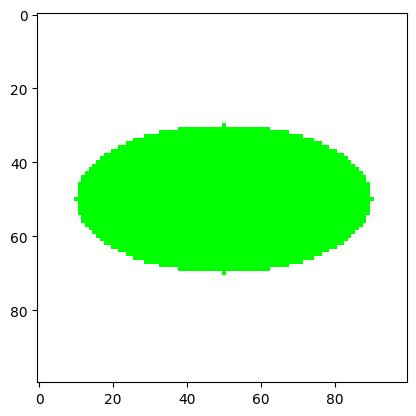

ok
test_rectangle_creation (__main__.TestDrawFunctions.test_rectangle_creation) ... 

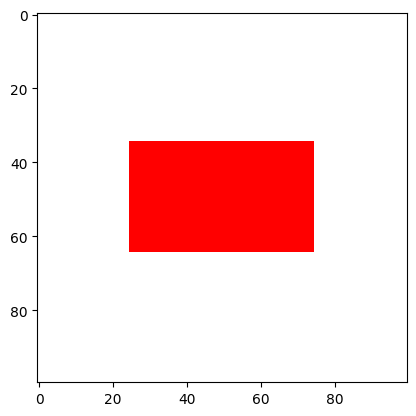

ok
test_sum_prod_one (__main__.TestSumProd.test_sum_prod_one) ... ok
test_sum_prod_two (__main__.TestSumProd.test_sum_prod_two) ... ok
test_analysis (__main__.TestTimeSeriesAnalysis.test_analysis) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.315s

OK


In [16]:
class TestOneHotEncoding(unittest.TestCase):
  def test_ohe_one(self):
    labels = np.array([0, 2, 3, 0])
    expected = np.array([[1, 0, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [1, 0, 0, 0]])
    np.testing.assert_array_equal(one_hot_encode(labels), expected)

  def test_ohe_two(self):
    labels = np.array([1, 0, 1, 2])
    expected = np.array([[0, 1, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]])
    np.testing.assert_array_equal(one_hot_encode(labels), expected)
  unittest.main(argv=[''], verbosity=2, exit=False)